In [ ]:
# pip install numpy matplotlib scikit-learn

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/46/69/8c4f928741c2a8efa255fdc7e9097527c6dc4e4df147e3cadc5d9357ce85/numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a6/b6/a9405484fb40746fdc6ae4502b16a9d6e53282ba5baaf9ebe2da579f68c4/matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/62/27/585859e72e117fe861c2079bcba35591a84f801e21bc1ab85bce6ce60305/scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef0396071


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: c:\SEMESTER 6\SML\myenv\Scripts\python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.svm import SVC
from sklearn.datasets import make_classification


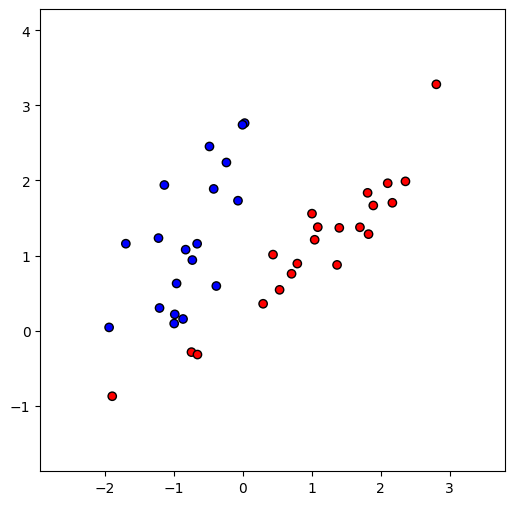

In [36]:

# Generate synthetic dataset
np.random.seed(42)
X, y = make_classification(n_samples=40, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1)
y = 2 * y - 1  # Convert labels to {-1, 1} for SVM

# Define range of C values to visualize
C_values = np.logspace(-2, 2, 30)  # From 0.01 to 100

# Set up plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

def plot_svm(C_index):
    ax.clear()
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    ax.set_title(f'SVM with C = {C_values[C_index]:.2f}')
    
    # Train SVM with given C
    clf = SVC(kernel='linear', C=C_values[C_index])
    clf.fit(X, y)
    
    # Get hyperplane parameters
    w = clf.coef_[0]
    b = clf.intercept_[0]
    
    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # Plot hyperplane
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    ax.plot(x_vals, y_vals, 'k', label='Hyperplane')
    
    # Plot margins
    margin = 1 / np.linalg.norm(w)
    y_vals_margin_up = y_vals + margin
    y_vals_margin_down = y_vals - margin
    ax.plot(x_vals, y_vals_margin_up, 'k--', label='Margin')
    ax.plot(x_vals, y_vals_margin_down, 'k--')
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    
    # Plot support vectors
    support_vectors = X[clf.support_]
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
    
    ax.legend()

# Create animation
ani = FuncAnimation(fig, plot_svm, frames=len(C_values), interval=300)
plt.show()


In [17]:
ani.save('svm_animation4.gif', writer='pillow', fps=10)

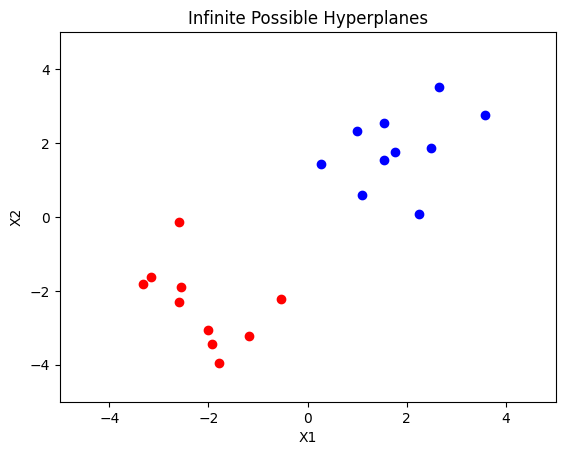

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
a= 3
b = 8
# Generate random data points for two classes
np.random.seed(42)
class_1 = np.random.randn(10, 2) + np.array([2, 2])  # Shifted cluster
class_2 = np.random.randn(10, 2) + np.array([-2, -2])  # Shifted cluster

def plot_hyperplane(ax, w, b, label):
    """Plot a single hyperplane"""
    x_vals = np.linspace(-4, 4, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    ax.plot(x_vals, y_vals, label=label)

# Set up figure and axis
fig, ax = plt.subplots()
ax.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
ax.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class -1')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Infinite Possible Hyperplanes")

# Generate random hyperplanes
num_hyperplanes = 10
hyperplanes = [(np.random.randn(2), np.random.randn()) for _ in range(num_hyperplanes)]

# Animation function
def animate(i):
    ax.clear()
    ax.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
    ax.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class -1')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.set_title("Infinite Possible Hyperplanes")
    w, b = hyperplanes[i]
    plot_hyperplane(ax, w, b, label=f'Hyperplane {i+1}')
    ax.legend()

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=num_hyperplanes, interval=1000, repeat=True)
plt.show()


In [2]:
ani.save('svm_animation3.gif', writer='pillow', fps=10)

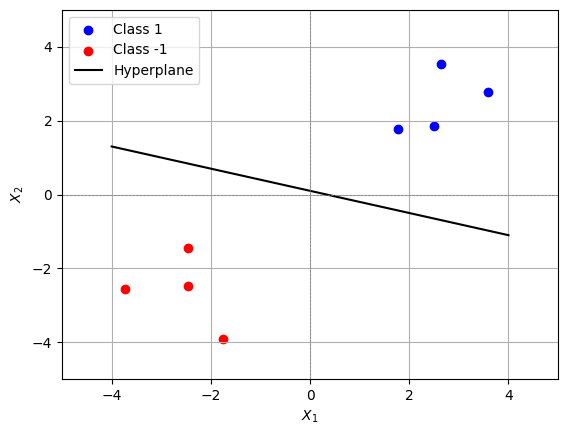

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data dua kelas
np.random.seed(42)
X1 = np.random.randn(4, 2) + np.array([2, 2])  # Class 1
X2 = np.random.randn(4, 2) + np.array([-2, -2])  # Class -1

# Koefisien hyperplane (contoh: 3x1 + 10x2 - 1 = 0)
w = np.array([3, 10])  # Berat (weight)
b = -1  # Bias

# Plot titik-titik
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class -1')

# Plot Hyperplane: w1*x1 + w2*x2 + b = 0
x_vals = np.linspace(-4, 4, 100)  # Rentang x
y_vals = (-w[0] * x_vals - b) / w[1]  # Selesaikan x2

plt.plot(x_vals, y_vals, 'k-', label="Hyperplane")

# Tambahan dekorasi
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
print(X1)
print(X2)

[[2.49671415 1.8617357 ]
 [2.64768854 3.52302986]
 [1.76584663 1.76586304]
 [3.57921282 2.76743473]]
[[-2.46947439 -1.45743996]
 [-2.46341769 -2.46572975]
 [-1.75803773 -3.91328024]
 [-3.72491783 -2.56228753]]


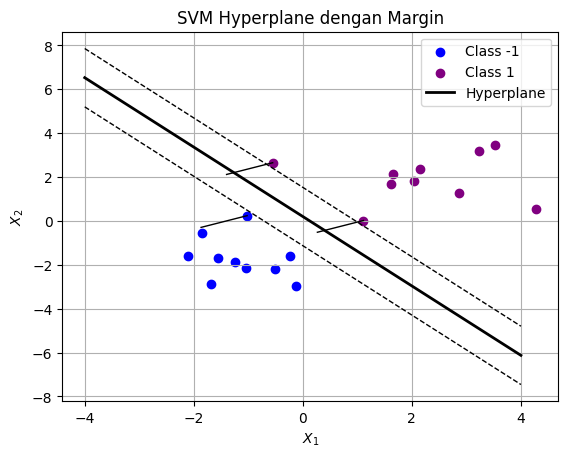

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Buat dataset
np.random.seed(0)
X1 = np.random.randn(10, 2) - [2, 2]  # Kelas -1
X2 = np.random.randn(10, 2) + [2, 2]  # Kelas 1
X = np.vstack((X1, X2))
y = np.hstack((-np.ones(10), np.ones(10)))

# Train SVM dengan kernel linear
clf = SVC(kernel='linear')
clf.fit(X, y)

# Ekstrak hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Plot dataset
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class -1')
plt.scatter(X2[:, 0], X2[:, 1], color='purple', label='Class 1')

# Buat grid untuk plot hyperplane
x_vals = np.linspace(-4, 4, 100)
y_vals = (-w[0] * x_vals - b) / w[1]
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Hyperplane')

# Plot margin
margin = 1 / np.linalg.norm(w)
y_margin_pos = (-w[0] * x_vals - b + margin) / w[1]
y_margin_neg = (-w[0] * x_vals - b - margin) / w[1]
plt.plot(x_vals, y_margin_pos, 'k--', linewidth=1)
plt.plot(x_vals, y_margin_neg, 'k--', linewidth=1)

# Plot support vectors dengan garis jarak ke hyperplane
support_vectors = clf.support_vectors_
for sv in support_vectors:
    margin_line_x = [sv[0], sv[0] - w[0] * margin]
    margin_line_y = [sv[1], sv[1] - w[1] * margin]
    plt.plot(margin_line_x, margin_line_y, 'k-', linewidth=1)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.title('SVM Hyperplane dengan Margin')
plt.show()


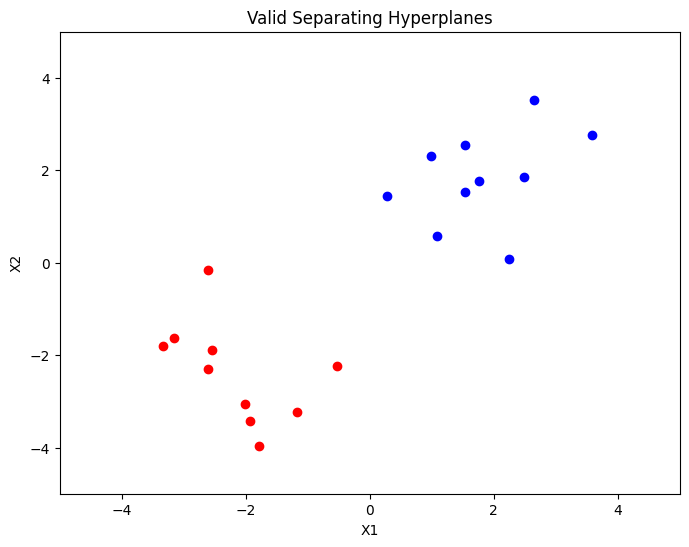

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Generate random data points for two classes
np.random.seed(42)
class_1 = np.random.randn(10, 2) + np.array([2, 2])  # Shifted cluster
class_2 = np.random.randn(10, 2) + np.array([-2, -2])  # Shifted cluster

def plot_hyperplane(ax, w, b, label):
    """Plot a single hyperplane dengan handling pembagian nol"""
    x_vals = np.linspace(-5, 5, 100)
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
    else:  # Jika hyperplane vertikal
        y_vals = np.linspace(-5, 5, 100)
        x_vals = np.full_like(y_vals, -b/w[0])
    ax.plot(x_vals, y_vals, label=label)

# Set up figure dan axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
ax.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class -1')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Valid Separating Hyperplanes")

# Fungsi untuk generate hyperplane valid
def generate_valid_hyperplane(class_a, class_b):
    while True:
        # Generate random direction
        w = np.random.randn(2)
        w /= np.linalg.norm(w)  # Normalisasi
        
        # Hitung proyeksi
        proj_a = np.dot(class_a, w)
        proj_b = np.dot(class_b, w)
        
        # Cari margin
        max_b = np.max(proj_b)
        min_a = np.min(proj_a)
        
        if max_b < min_a:  # Jika ada ruang untuk hyperplane
            b = -(min_a + max_b)/2
            return (w, b)

# Generate 10 hyperplane valid
num_hyperplanes = 10
hyperplanes = [generate_valid_hyperplane(class_1, class_2) for _ in range(num_hyperplanes)]

# Animasi
def animate(i):
    ax.clear()
    ax.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
    ax.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class -1')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    w, b = hyperplanes[i]
    plot_hyperplane(ax, w, b, label=f'Hyperplane {i+1}')
    ax.legend()

ani = animation.FuncAnimation(fig, animate, frames=num_hyperplanes, interval=1000, repeat=True)
plt.show()

In [9]:
ani.save(filename="assets/svm_anim3.gif", writer="pillow", fps=10)

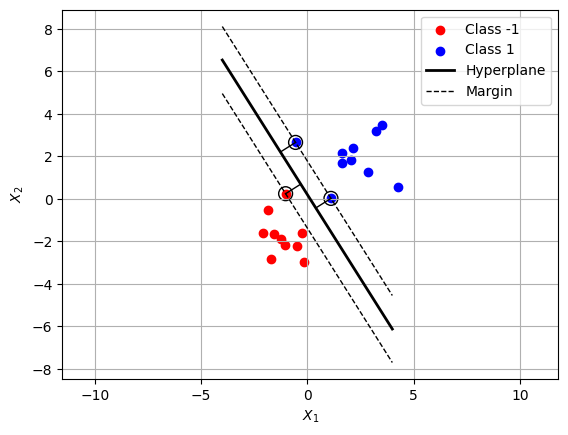

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Buat dataset
np.random.seed(0)
X1 = np.random.randn(10, 2) - [2, 2]  # Kelas -1
X2 = np.random.randn(10, 2) + [2, 2]  # Kelas 1
X = np.vstack((X1, X2))
y = np.hstack((-np.ones(10), np.ones(10)))

# Train SVM dengan kernel linear
clf = SVC(kernel='linear')
clf.fit(X, y)

# Ekstrak hyperplane
w = clf.coef_[0]  # Vektor normal hyperplane
b = clf.intercept_[0]  # Bias/intercept

# Plot dataset
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class -1')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 1')

# Buat grid untuk plot hyperplane
x_vals = np.linspace(-4, 4, 100)
y_vals = (-w[0] * x_vals - b) / w[1]  # Persamaan hyperplane: w[0]*x + w[1]*y + b = 0
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Hyperplane')

# Hitung margin
margin = 1 / np.linalg.norm(w)
y_margin_pos = (-w[0] * x_vals - b + 1) / w[1]  # Margin positif
y_margin_neg = (-w[0] * x_vals - b - 1) / w[1]  # Margin negatif
plt.plot(x_vals, y_margin_pos, 'k--', linewidth=1, label='Margin')
plt.plot(x_vals, y_margin_neg, 'k--', linewidth=1)

# Plot support vectors dan garis jarak ke hyperplane
support_vectors = clf.support_vectors_
for sv in support_vectors:
    # Titik support vector
    plt.scatter(sv[0], sv[1], s=100, facecolors='none', edgecolors='k', label='Support Vector' if sv is support_vectors[0] else "")
    
    # Hitung proyeksi titik pada hyperplane
    # Jarak dari sv ke hyperplane: |w . sv + b| / ||w||
    distance = (np.dot(w, sv) + b) / np.linalg.norm(w)
    
    # Titik proyeksi pada hyperplane (sv - distance * w/||w||)
    w_normalized = w / np.linalg.norm(w)
    projection = sv - distance * w_normalized
    
    # Plot garis dari support vector ke proyeksi pada hyperplane
    plt.plot([sv[0], projection[0]], [sv[1], projection[1]], 'k-', linewidth=1)

# Pengaturan plot
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.axis('equal')  # Memastikan skala sumbu sama untuk visualisasi yang lebih baik
plt.show()

In [13]:
print(w)
print(b)

[1.00304533 0.63402127]
-0.12797095171981723
